In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

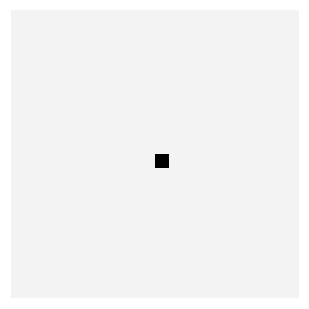

In [20]:
imgAct = np.zeros((20,20))
imgAct[10][10]=1

def actualizaImagen(imgActual):  
    imgNueva = np.zeros((20,20))
    for i in range(19):
        for j in range(19):
            imgNueva[i][j] = laplaciano(i,j, imgActual)
    return imgNueva


def laplaciano(x,y, imgActual):
    nuevo = imgActual[x][y]
    nuevo += imgActual[x-1][y-1]*0.2
    nuevo += imgActual[x-1][y+1]*0.2
    nuevo += imgActual[x+1][y-1]*0.2
    nuevo += imgActual[x+1][y+1]*0.2    
    nuevo += imgActual[x][y+1]*0.5
    nuevo += imgActual[x][y-1]*0.5
    nuevo += imgActual[x+1][y]*0.5
    nuevo += imgActual[x-1][y]*0.5
    return nuevo


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(imgActual, cmap=plt.cm.binary, interpolation='nearest')
im.set_clim(-0.05, 1)

def init():
    im.set_data(imgActual)
    return (im,)

def animate(i):
    im.set_data(animate.X)
    animate.X=actualizaImagen(animate.X)
    return (im,)
animate.X = imgAct

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=500)

HTML(anim.to_jshtml())